In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import torch
import torchvision
from torch.utils.data import DataLoader, Dataset
import pandas as pd
import numpy as np
from torch import nn
from torchvision.transforms import transforms
from PIL import Image
import os
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from torch import device
from torchvision import models
from torch.utils.data import random_split
import torch.nn.functional as F
import seaborn as sns

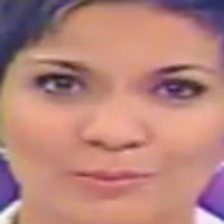

In [4]:
img = Image.open('/content/drive/MyDrive/data/train/real/123_0005_01.jpg')
img

In [5]:
img.size

(224, 224)

In [6]:
test_transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]
)

train_transform = transforms.Compose(
    [
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]
)

torch.manual_seed(42)

batch_size = 64
trainset = torchvision.datasets.ImageFolder(root='/content/drive/MyDrive/data/train', transform=train_transform)
testset = torchvision.datasets.ImageFolder(root='/content/drive/MyDrive/data/test', transform=test_transform)

train_size = int(0.8 * len(trainset))
val_size = len(trainset) - train_size

train_dataset, val_dataset = random_split(trainset, [train_size, val_size])

trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

In [7]:
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(in_features=model.fc.in_features, out_features=1)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 101MB/s]


In [8]:
loss_func = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [ ]:
def save_checkpoint(model, epoch, optimizer, loss, filepath):
  torch.save({
      'epoch': epoch,
      'model_state_dict': model.state_dict(),
      'optimizer_state_dict': optimizer.state_dict(),
      'loss': loss
  }, filepath)

In [ ]:
NUM_EPOCHS = 30

In [ ]:
# for epoch in range(1, NUM_EPOCHS + 1):
#     model.train()
#     train_loss = 0
#     for images, labels in trainloader:
#         labels = labels.float()
#         outputs = model(images).squeeze()
#         loss = loss_func(outputs, labels)
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#         train_loss += loss.item()

#     model.eval()
#     val_loss = 0
#     correct = 0
#     total = 0
#     with torch.no_grad():
#         for images, labels in valloader:
#             labels = labels.float()
#             outputs = model(images).squeeze()
#             loss = loss_func(outputs, labels)
#             val_loss += loss.item()

#             preds = (torch.sigmoid(outputs) > 0.5).int()
#             correct += (preds == labels.int()).sum().item()
#             total += labels.size(0)

#     avg_train_loss = train_loss / len(trainloader)
#     avg_val_loss = val_loss / len(valloader)
#     val_accuracy = correct / total

#     print(f"Epoch {epoch}/{NUM_EPOCHS} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f} | Val Acc: {val_accuracy:.4f}")
#     if epoch % 2 == 0:
#         save_checkpoint(model, epoch, optimizer, loss, f'/content/drive/MyDrive/ColabNotebooks/deepfake_CNN/pretrainedCheckpoints/model_epoch_{epoch}.pth')
#         print(f'Epoch: {epoch}, Loss: {loss} Checkpoint saved at this epoch: {epoch}')

KeyboardInterrupt: 

In [9]:
# When resuming and evaluating
checkpoint = torch.load('/content/drive/MyDrive/ColabNotebooks/deepfake_CNN/pretrainedCheckpoints/model_epoch_30.pth')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
start_epoch = checkpoint['epoch'] + 1

In [10]:
model.state_dict()

OrderedDict([('conv1.weight',
              tensor([[[[-1.2349e-02, -5.9883e-03, -7.6825e-04,  ...,  5.7919e-02,
                          1.8755e-02, -1.1355e-02],
                        [ 1.0880e-02,  1.1766e-02, -1.0591e-01,  ..., -2.6685e-01,
                         -1.2451e-01,  7.8401e-03],
                        [-7.6102e-03,  6.0020e-02,  2.9800e-01,  ...,  5.2333e-01,
                          2.5999e-01,  6.6652e-02],
                        ...,
                        [-2.7731e-02,  1.6076e-02,  7.2550e-02,  ..., -3.3314e-01,
                         -4.2026e-01, -2.5678e-01],
                        [ 3.0496e-02,  4.0892e-02,  6.3031e-02,  ...,  4.1347e-01,
                          3.9310e-01,  1.6650e-01],
                        [-1.3673e-02, -3.0194e-03, -2.3393e-02,  ..., -1.4931e-01,
                         -8.0886e-02, -3.5187e-03]],
              
                       [[-1.3801e-02, -2.6449e-02, -3.3783e-02,  ...,  3.2642e-02,
                          9.9646

In [ ]:
# for epoch in range(start_epoch, NUM_EPOCHS + 1):
#     model.train()
#     train_loss = 0
#     for images, labels in trainloader:
#         labels = labels.float()
#         outputs = model(images).squeeze()
#         loss = loss_func(outputs, labels)
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#         train_loss += loss.item()

#     model.eval()
#     val_loss = 0
#     correct = 0
#     total = 0
#     with torch.no_grad():
#         for images, labels in valloader:
#             labels = labels.float()
#             outputs = model(images).squeeze()
#             loss = loss_func(outputs, labels)
#             val_loss += loss.item()

#             preds = (torch.sigmoid(outputs) > 0.5).int()
#             correct += (preds == labels.int()).sum().item()
#             total += labels.size(0)

#     avg_train_loss = train_loss / len(trainloader)
#     avg_val_loss = val_loss / len(valloader)
#     val_accuracy = correct / total

#     print(f"Epoch {epoch}/{NUM_EPOCHS} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f} | Val Acc: {val_accuracy:.4f}")
#     if epoch % 2 == 0:
#         save_checkpoint(model, epoch, optimizer, loss, f'/content/drive/MyDrive/ColabNotebooks/deepfake_CNN/pretrainedCheckpoints/model_epoch_{epoch}.pth')
#         print(f'Epoch: {epoch}, Loss: {loss} Checkpoint saved at this epoch: {epoch}')

Epoch 25/30 | Train Loss: 0.0597 | Val Loss: 0.4104 | Val Acc: 0.8838
Epoch 26/30 | Train Loss: 0.0474 | Val Loss: 0.3764 | Val Acc: 0.8926
Epoch: 26, Loss: 0.040501952171325684 Checkpoint saved at this epoch: 26
Epoch 27/30 | Train Loss: 0.0362 | Val Loss: 0.4703 | Val Acc: 0.8771
Epoch 28/30 | Train Loss: 0.0528 | Val Loss: 0.4243 | Val Acc: 0.8838
Epoch: 28, Loss: 0.03500903770327568 Checkpoint saved at this epoch: 28
Epoch 29/30 | Train Loss: 0.0429 | Val Loss: 0.3441 | Val Acc: 0.9024
Epoch 30/30 | Train Loss: 0.0359 | Val Loss: 0.3678 | Val Acc: 0.8957
Epoch: 30, Loss: 0.14867167174816132 Checkpoint saved at this epoch: 30


In [10]:
def evaluate_model(model, testloader, loss_func):
    model.eval()
    total_loss = 0.0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in testloader:
            labels = labels.float()
            outputs = model(images).squeeze()

            # Compute loss
            loss = loss_func(outputs, labels)
            total_loss += loss.item()

            # Predictions
            probs = torch.sigmoid(outputs)
            preds = (probs > 0.5).int()

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_loss = total_loss / len(testloader)
    accuracy = accuracy_score(all_labels, all_preds)

    print(f"\nTest Loss: {avg_loss:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, target_names=testset.classes))

    return all_labels, all_preds

In [11]:
test_labels, test_preds = evaluate_model(model, testloader, loss_func)


Test Loss: 0.3043
Test Accuracy: 0.9102

Classification Report:
              precision    recall  f1-score   support

        fake       0.93      0.90      0.92      2247
        real       0.89      0.92      0.90      1851

    accuracy                           0.91      4098
   macro avg       0.91      0.91      0.91      4098
weighted avg       0.91      0.91      0.91      4098



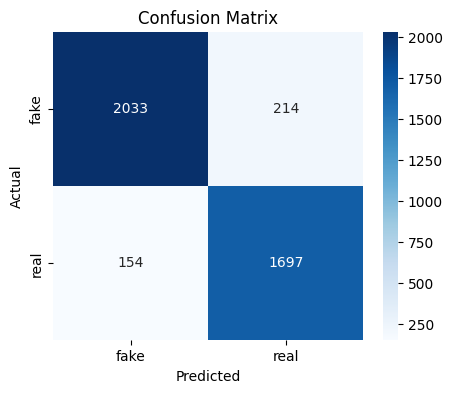

In [14]:
cm = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=testset.classes, yticklabels=testset.classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()